Diese Zelle lädt alle nötigen Bibliotheken. Dann wird der Datensatz eingelesen und angezeigt, um ein erstes Gefühl zu bekommen.

In [180]:
%pip install matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load the dataset
patient_data = pd.read_csv('diabetes_original_train.csv')

#read the data
patient_data.head()


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,109.0,58.0,18.0,116.0,28.5,0.219,22.0,0.0
1,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1.0
2,2.0,81.0,60.0,22.0,0.0,27.7,0.290,25.0,0.0
3,5.0,115.0,98.0,0.0,0.0,52.9,0.209,28.0,1.0
4,1.0,193.0,50.0,16.0,375.0,25.9,0.655,24.0,0.0


Der Datensatz wird in Features X und Zielvariable y aufgeteilt.
Anschließend werden die Daten in Training und Test getrennt.
stratify=y sorgt dafür, dass die Outcome-Verteilung in beiden Sets gleich bleibt.
Sehr wichtig, unbedingt lassen.

In [181]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Daten laden
patient_data = pd.read_csv("diabetes_original_train.csv")

# 2. Zielvariable und Features trennen
y = patient_data["Outcome"]
X = patient_data.drop(columns=["Outcome"])

# 3. Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # sorgt für gleiche Klassenverteilung
)

# 4. Überblick
print("Trainingsdaten:", X_train.shape)
print("Testdaten:", X_test.shape)

# Optional: prüfen, ob die Zielverteilung erhalten bleibt
print("\nVerteilung im Training:")
print(y_train.value_counts(normalize=True))
print("\nVerteilung im Test:")
print(y_test.value_counts(normalize=True))


Trainingsdaten: (491, 8)
Testdaten: (123, 8)

Verteilung im Training:
Outcome
0.0    0.651731
1.0    0.348269
Name: proportion, dtype: float64

Verteilung im Test:
Outcome
0.0    0.650407
1.0    0.349593
Name: proportion, dtype: float64


Zeigt den Mittelwert jeder numerischen Spalte an.

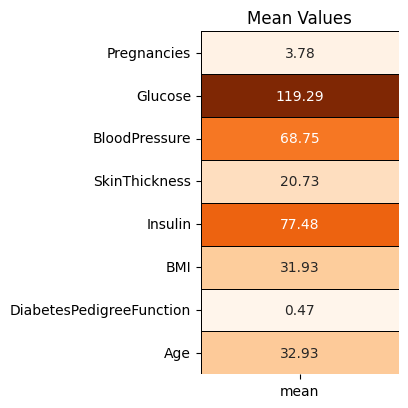

In [182]:
#create a subplot with 1 row, 1 col and figure size (5,5)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
colors = ['#FF781F', '#2D2926']

plt.subplot(1, 1, 1)
sns.heatmap(
    X.describe().T[['mean']],
    cmap='Oranges',
    annot=True,
    fmt='.2f',
    linecolor='black',
    linewidths=0.4,
    cbar=False
)
plt.title('Mean Values')

fig.tight_layout(pad=4)
plt.show()


Explore the data


In [183]:
col = list(patient_data.columns)

# Outcome entfernen, weil es die Zielvariable ist
col.remove("Outcome")

categorical_features = []   # es gibt keine echte Kategorie in diesem Dataset
numerical_features = [*col]

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


Categorical Features: []
Numerical Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


Zeigt die Verteilung aller Features.
Sehr nützlich, um Schiefe, Ausreißer oder Besonderheiten zu erkennen.
Wichtig für Explorative Datenanalyse.

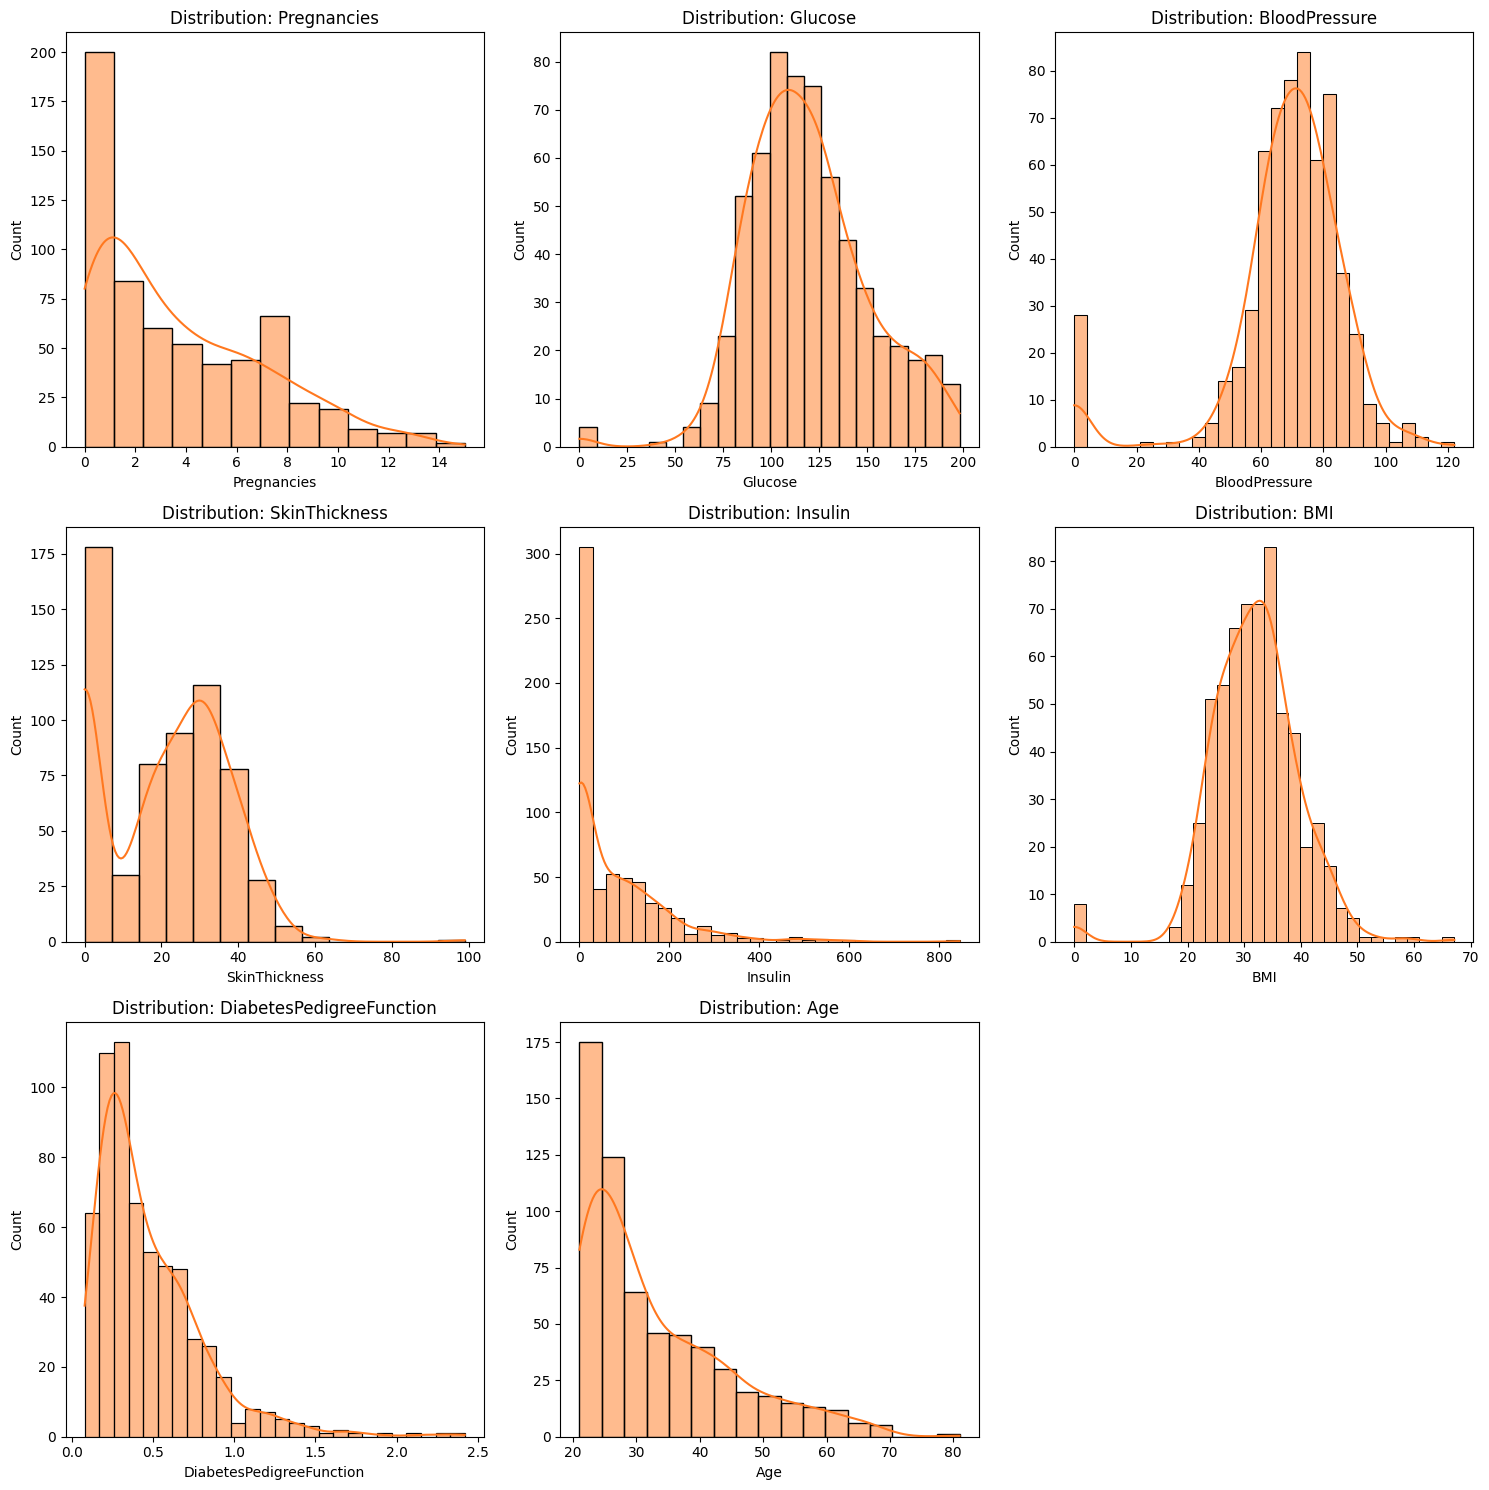

In [184]:
# Farben wie im Original
colors = ['#FF781F', '#2D2926']

# 8 numerische Features
numerical_features = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]

# Subplot 3x3 (9 Felder, 8 Features)
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# flaches ax Array erzeugen
ax = ax.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(patient_data[feature], kde=True, color=colors[0], ax=ax[i])
    ax[i].set_title("Distribution: " + feature)

# das letzte leere Feld ausblenden
ax[-1].axis("off")

plt.tight_layout()
plt.show()


Top / Middle / Lowest Werte für jedes Feature

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:21: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:38: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:55: FutureWarning:



Pass

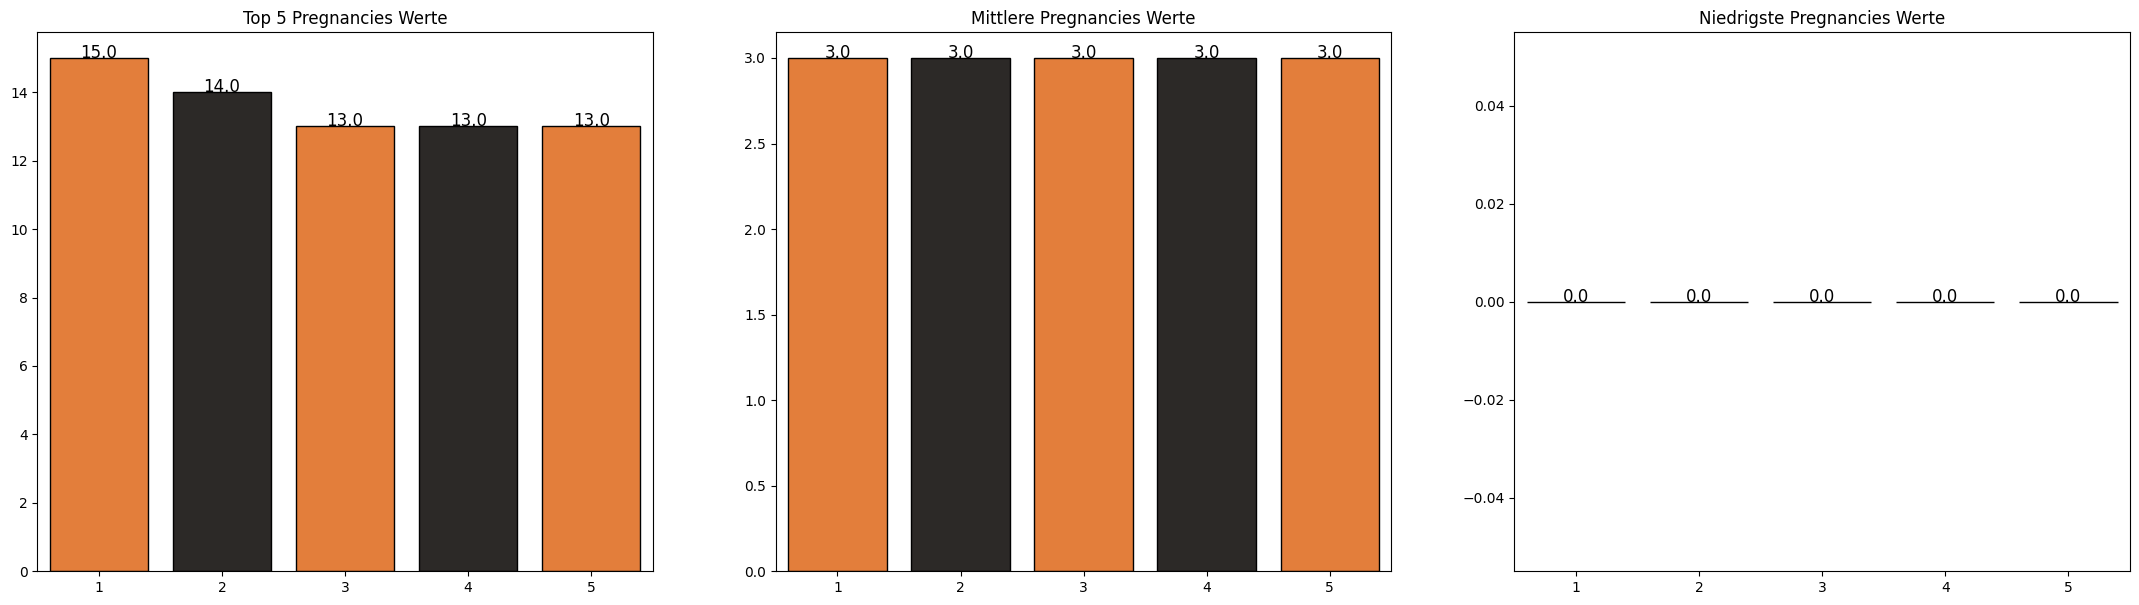

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:21: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:38: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:55: FutureWarning:



Pass

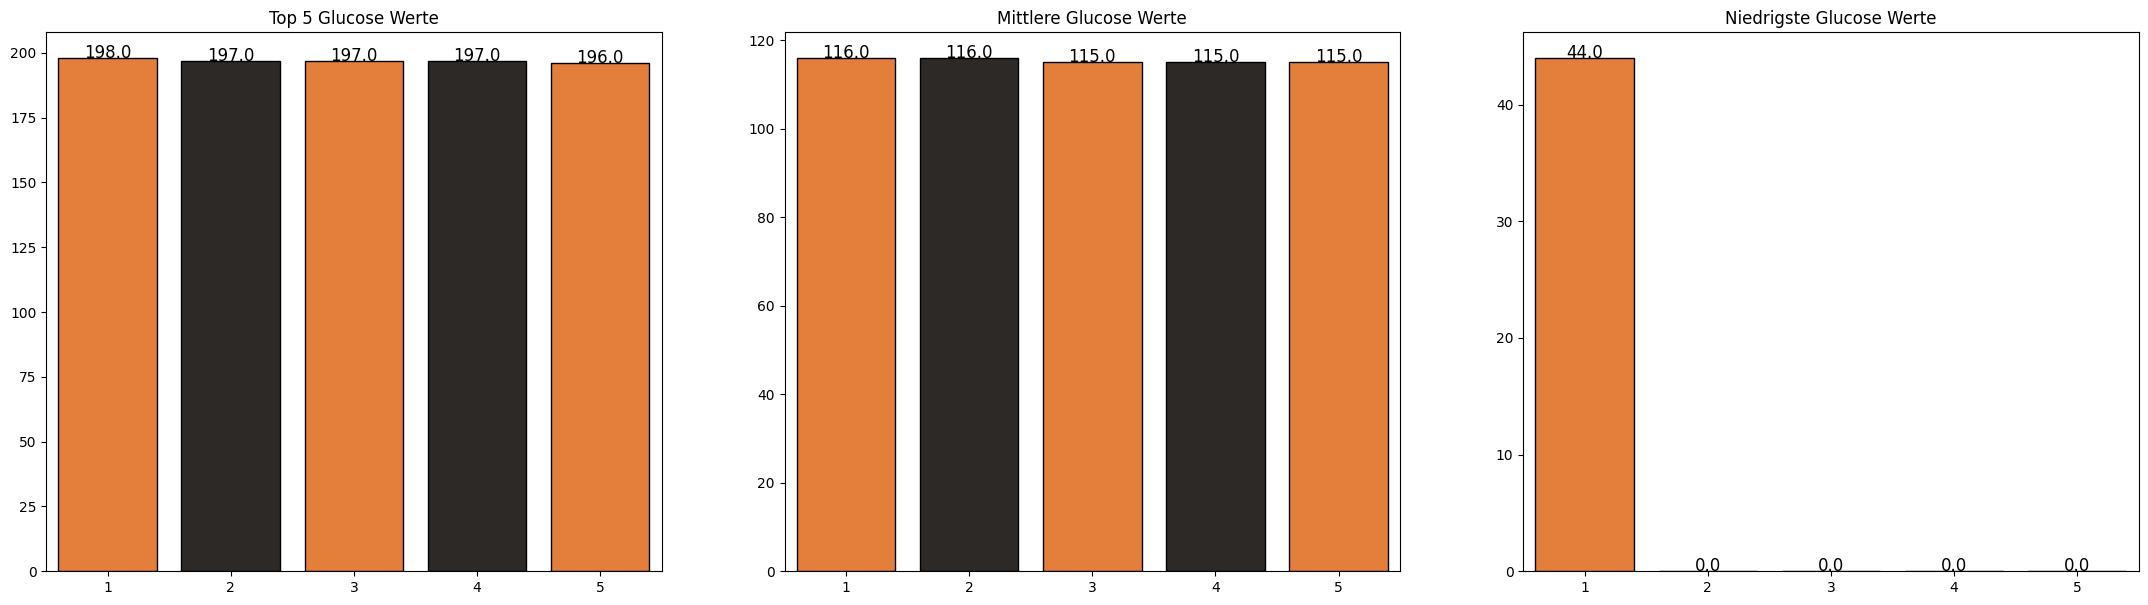

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:21: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:38: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:55: FutureWarning:



Pass

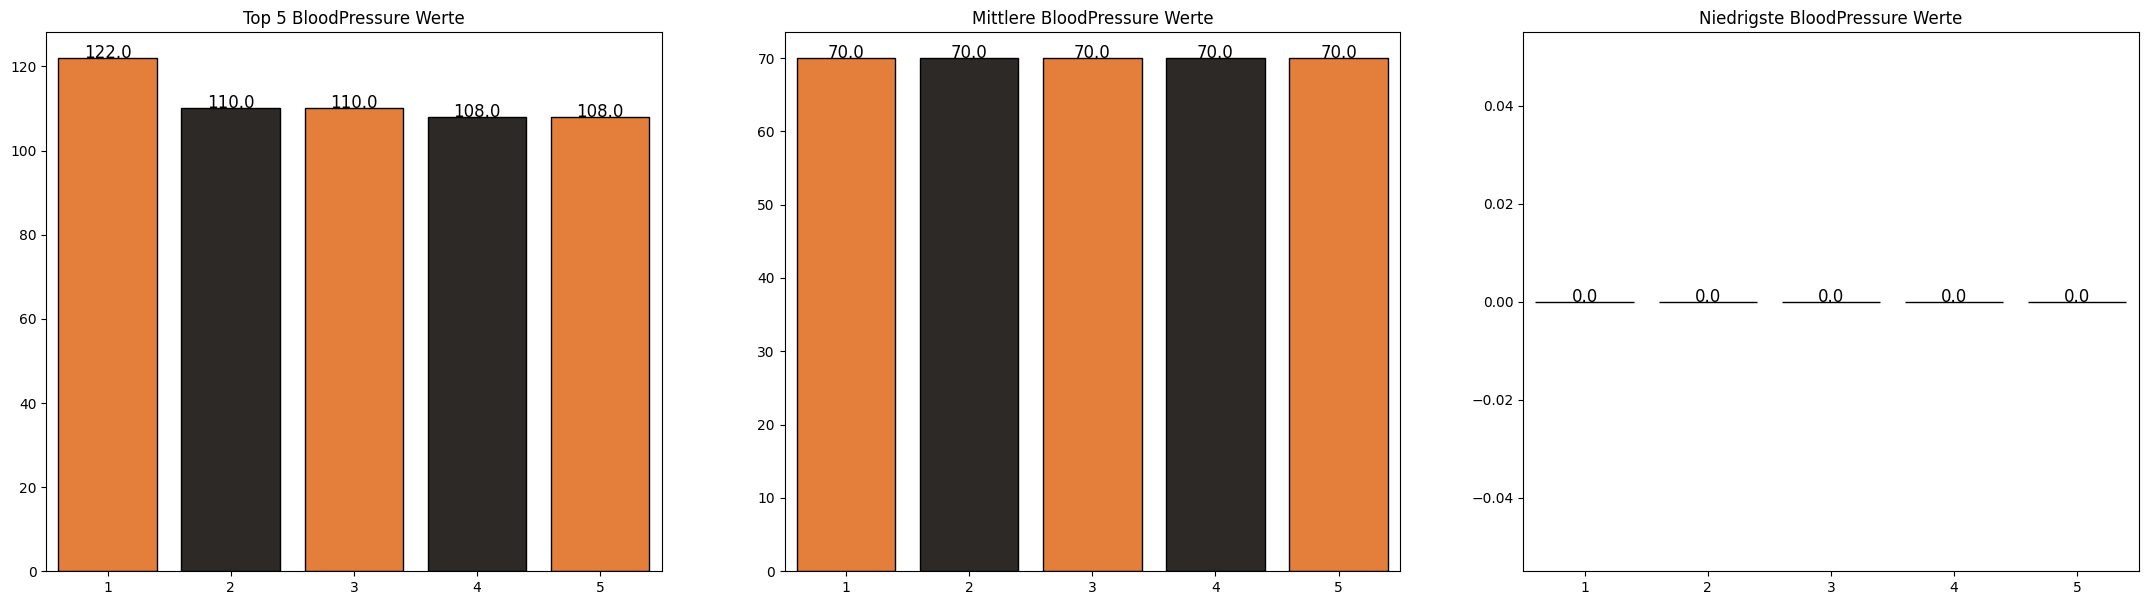

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:21: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:38: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:55: FutureWarning:



Pass

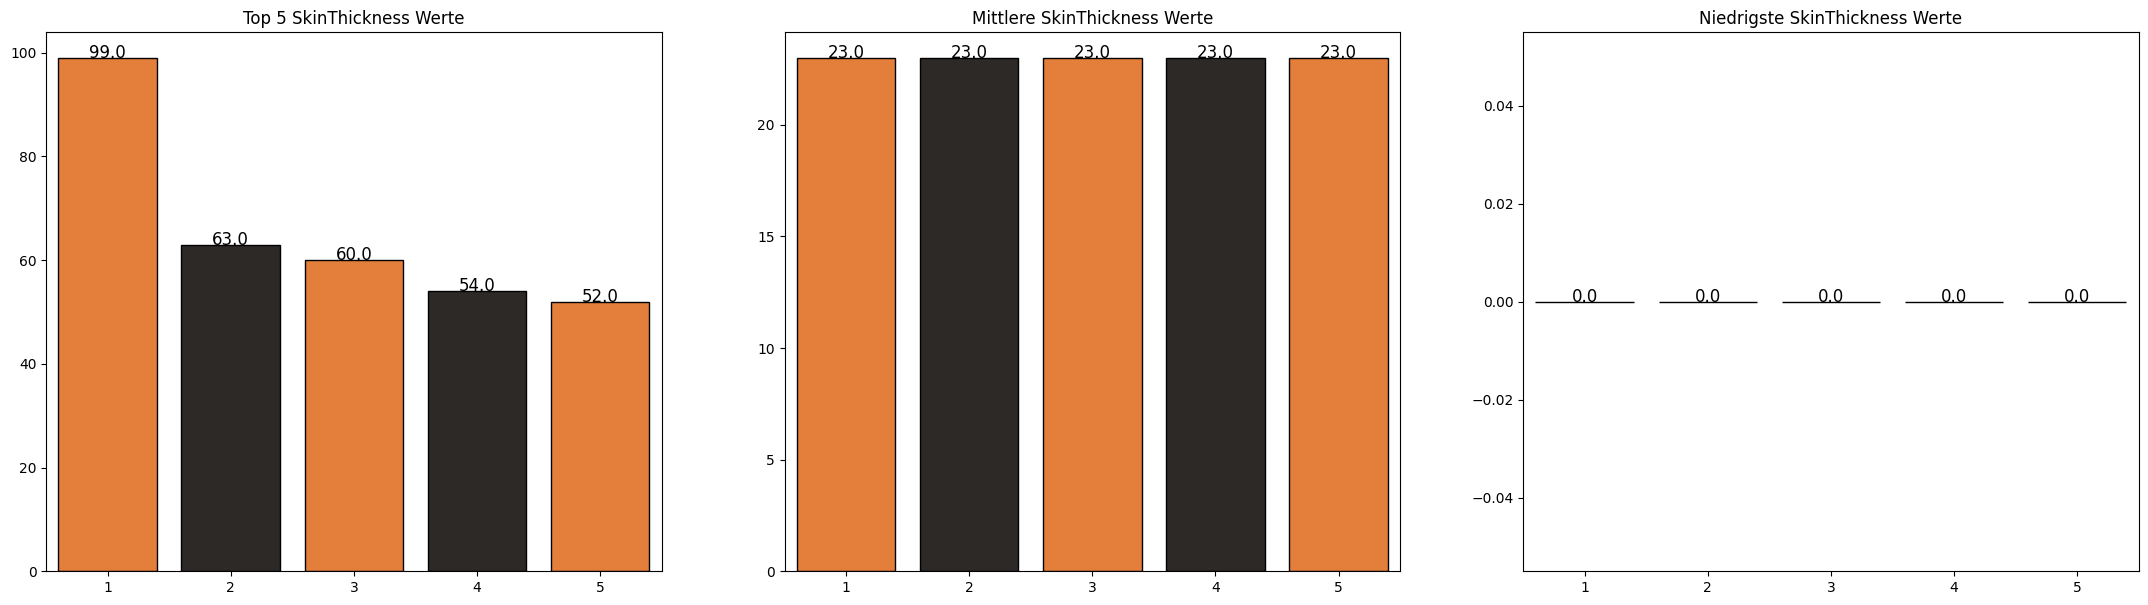

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:21: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:38: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:55: FutureWarning:



Pass

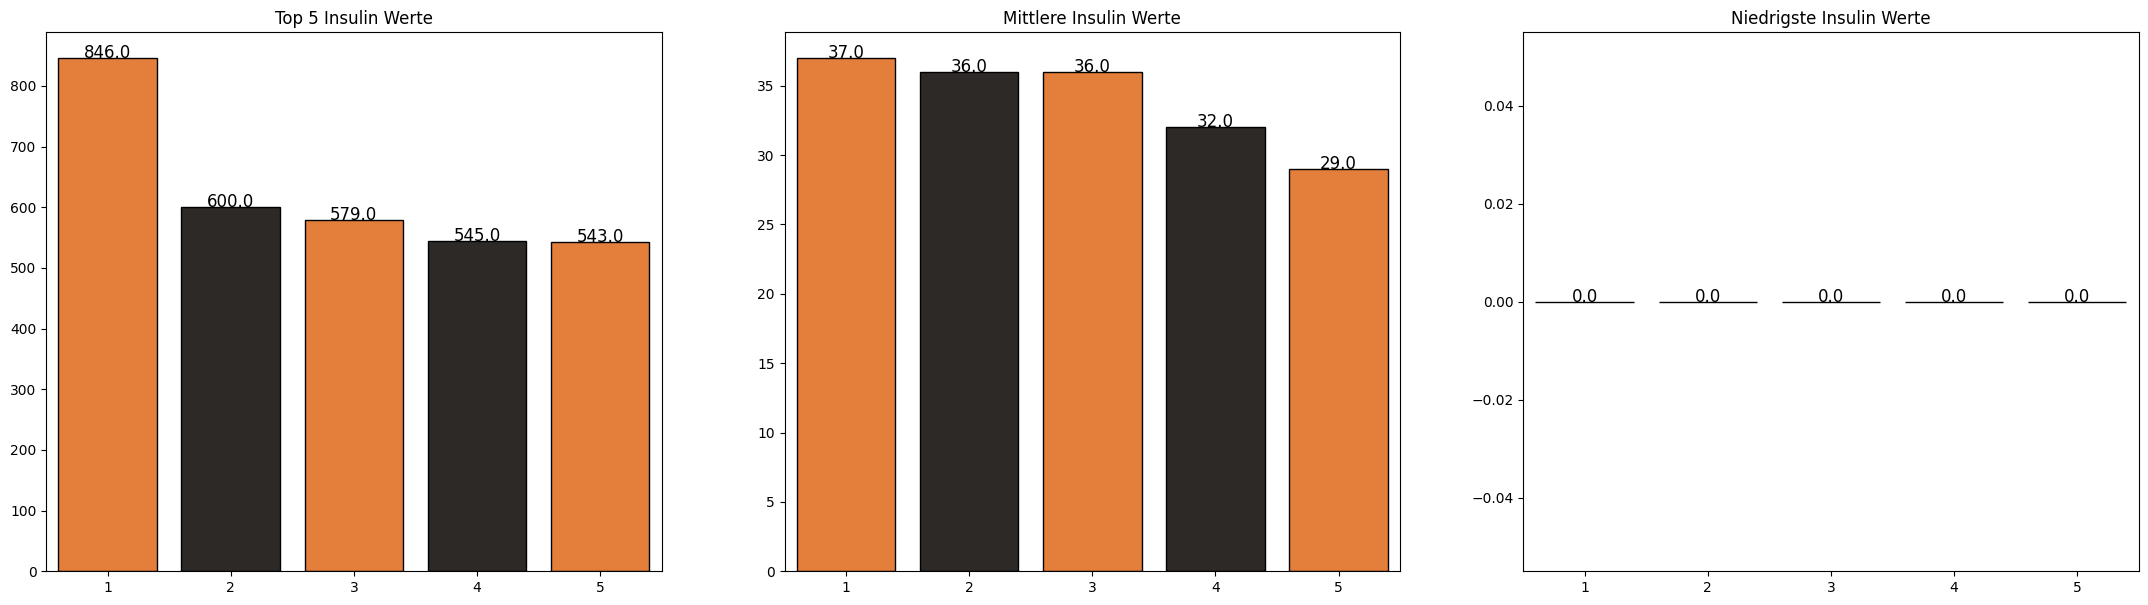

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:21: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:38: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:55: FutureWarning:



Pass

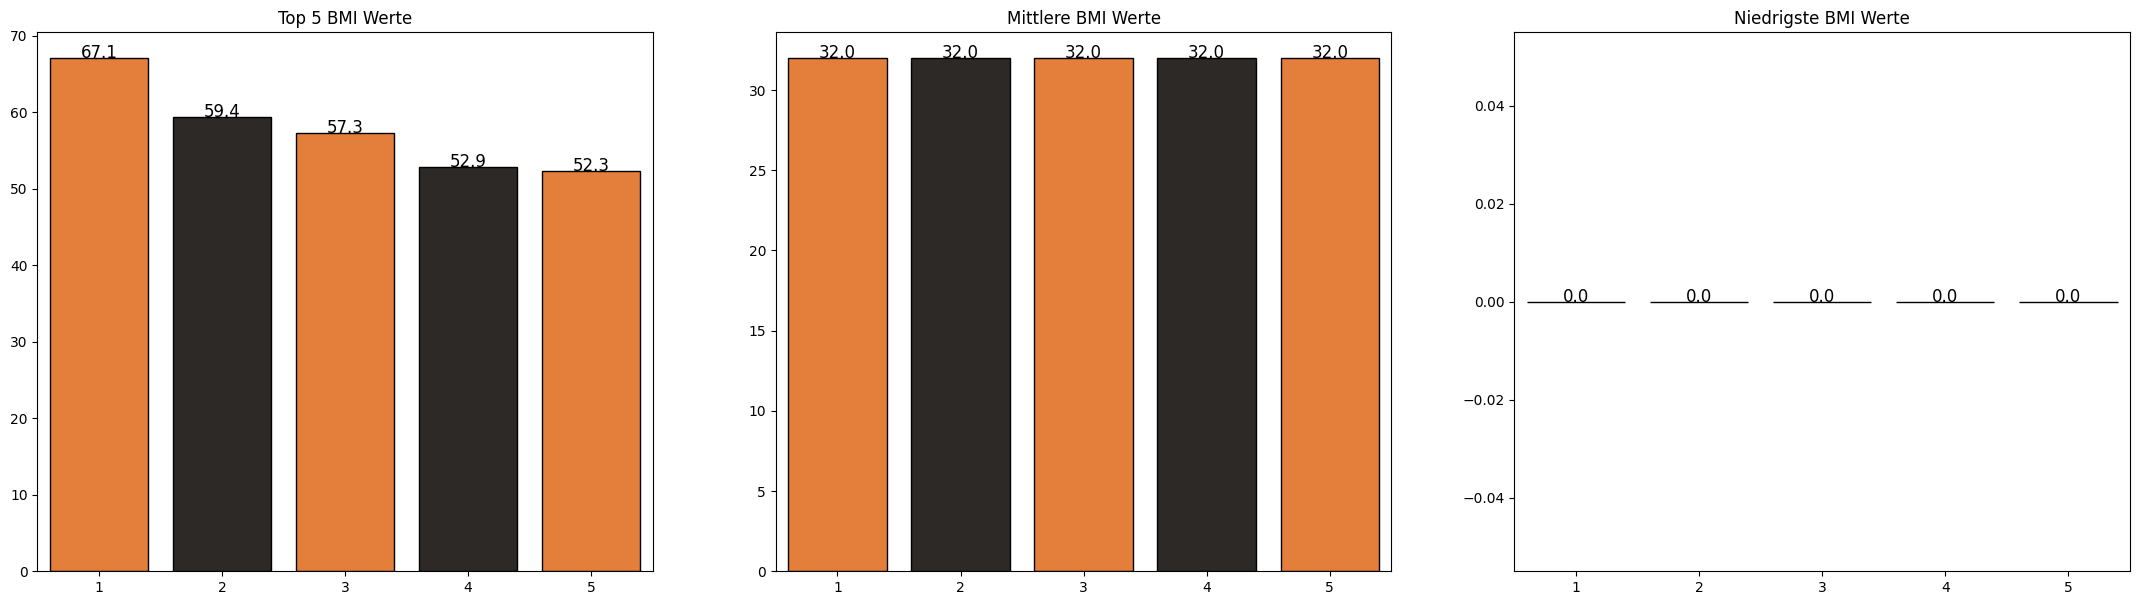

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:21: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:38: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:55: FutureWarning:



Pass

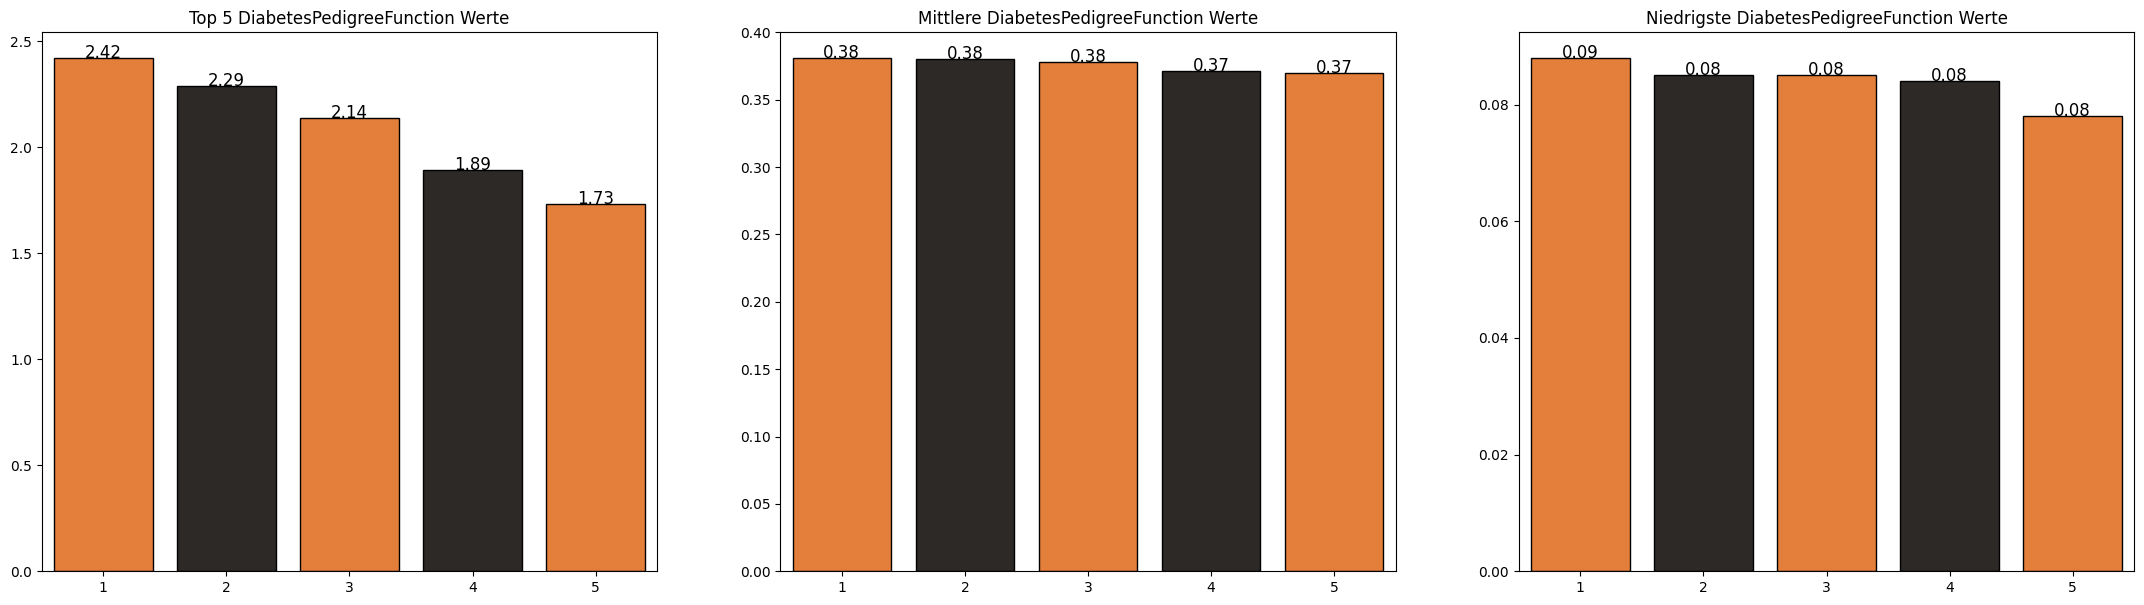

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:21: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:38: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:38: UserWarning:


The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.

C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\3384917949.py:55: FutureWarning:



Pass

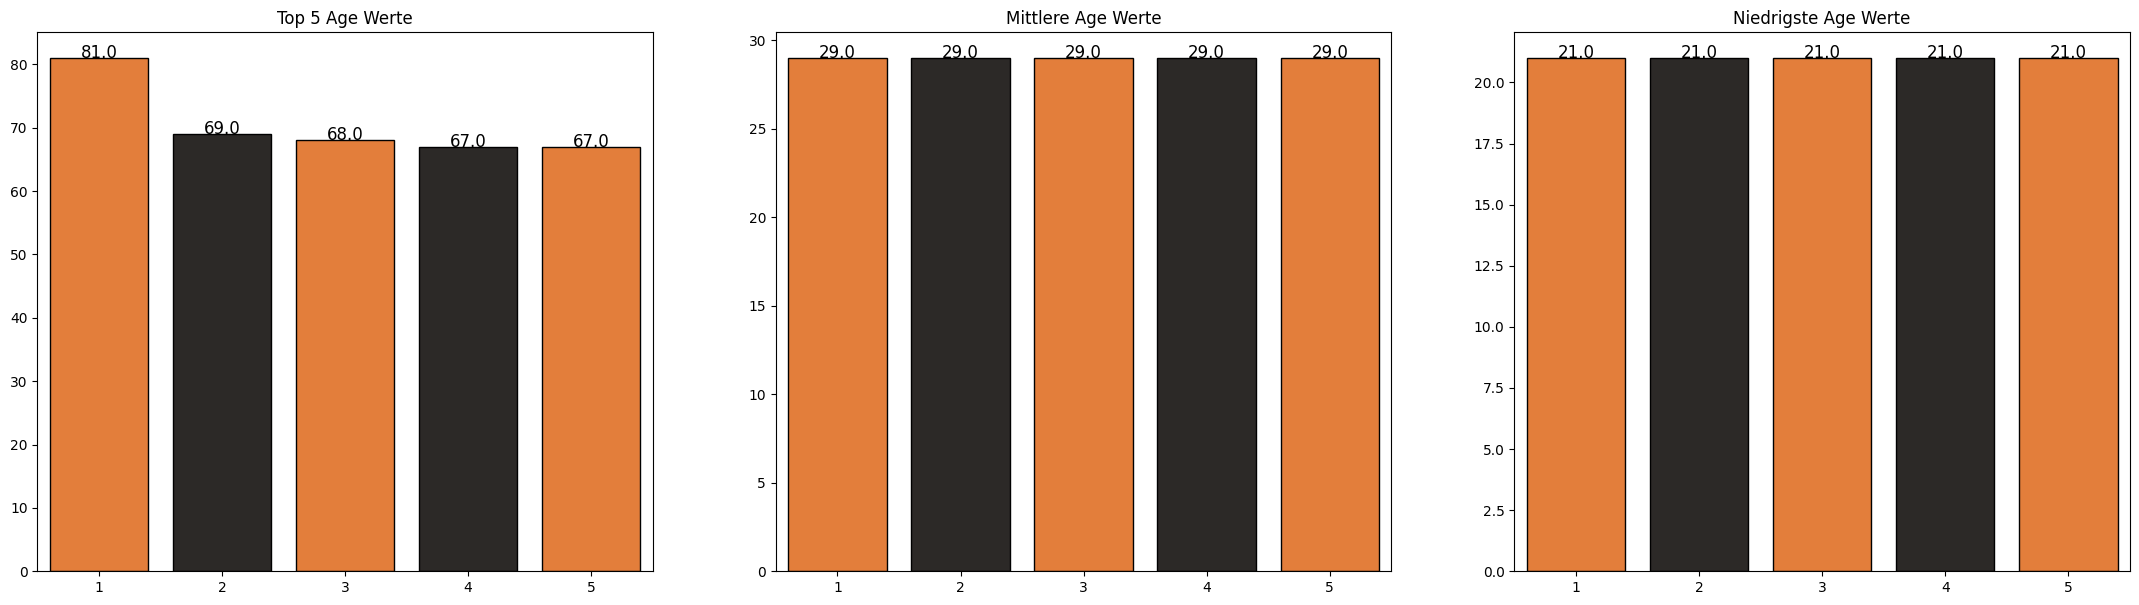

In [185]:
colors = ['#FF781F', '#2D2926']

numerical_features = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]

# Funktion für einzelne Feature Darstellung
def plot_feature_splits(df, feature):
    sorted_data = df.sort_values(by=feature, ascending=False)

    mid_start = len(sorted_data) // 2 - 2
    mid_end = mid_start + 5

    plt.figure(figsize=(27, 7))

    # --------------------------------------------------------
    # 1. Top 5
    plt.subplot(1, 3, 1)
    top5 = sorted_data.iloc[:5]
    ax = sns.barplot(
        x=np.arange(1, 6),
        y=top5[feature].values,
        palette=colors,
        edgecolor='black'
    )
    plt.title(f"Top 5 {feature} Werte")
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2,
                rect.get_height(),
                round(rect.get_height(), 2),
                ha='center', fontsize=12)

    # --------------------------------------------------------
    # 2. Mittel 5
    plt.subplot(1, 3, 2)
    mid5 = sorted_data.iloc[mid_start:mid_end]
    ax = sns.barplot(
        x=np.arange(1, 6),
        y=mid5[feature].values,
        palette=colors,
        edgecolor='black'
    )
    plt.title(f"Mittlere {feature} Werte")
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2,
                rect.get_height(),
                round(rect.get_height(), 2),
                ha='center', fontsize=12)

    # --------------------------------------------------------
    # 3. Niedrigste 5
    plt.subplot(1, 3, 3)
    low5 = sorted_data.iloc[-5:]
    ax = sns.barplot(
        x=np.arange(1, 6),
        y=low5[feature].values,
        palette=colors,
        edgecolor='black'
    )
    plt.title(f"Niedrigste {feature} Werte")
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2,
                rect.get_height(),
                round(rect.get_height(), 2),
                ha='center', fontsize=12)

    plt.show()


# -------------------------------
# Jetzt für alle Features ausführen
# -------------------------------
for feature in numerical_features:
    plot_feature_splits(patient_data, feature)

Boxplots (Ausreißeranalyse)

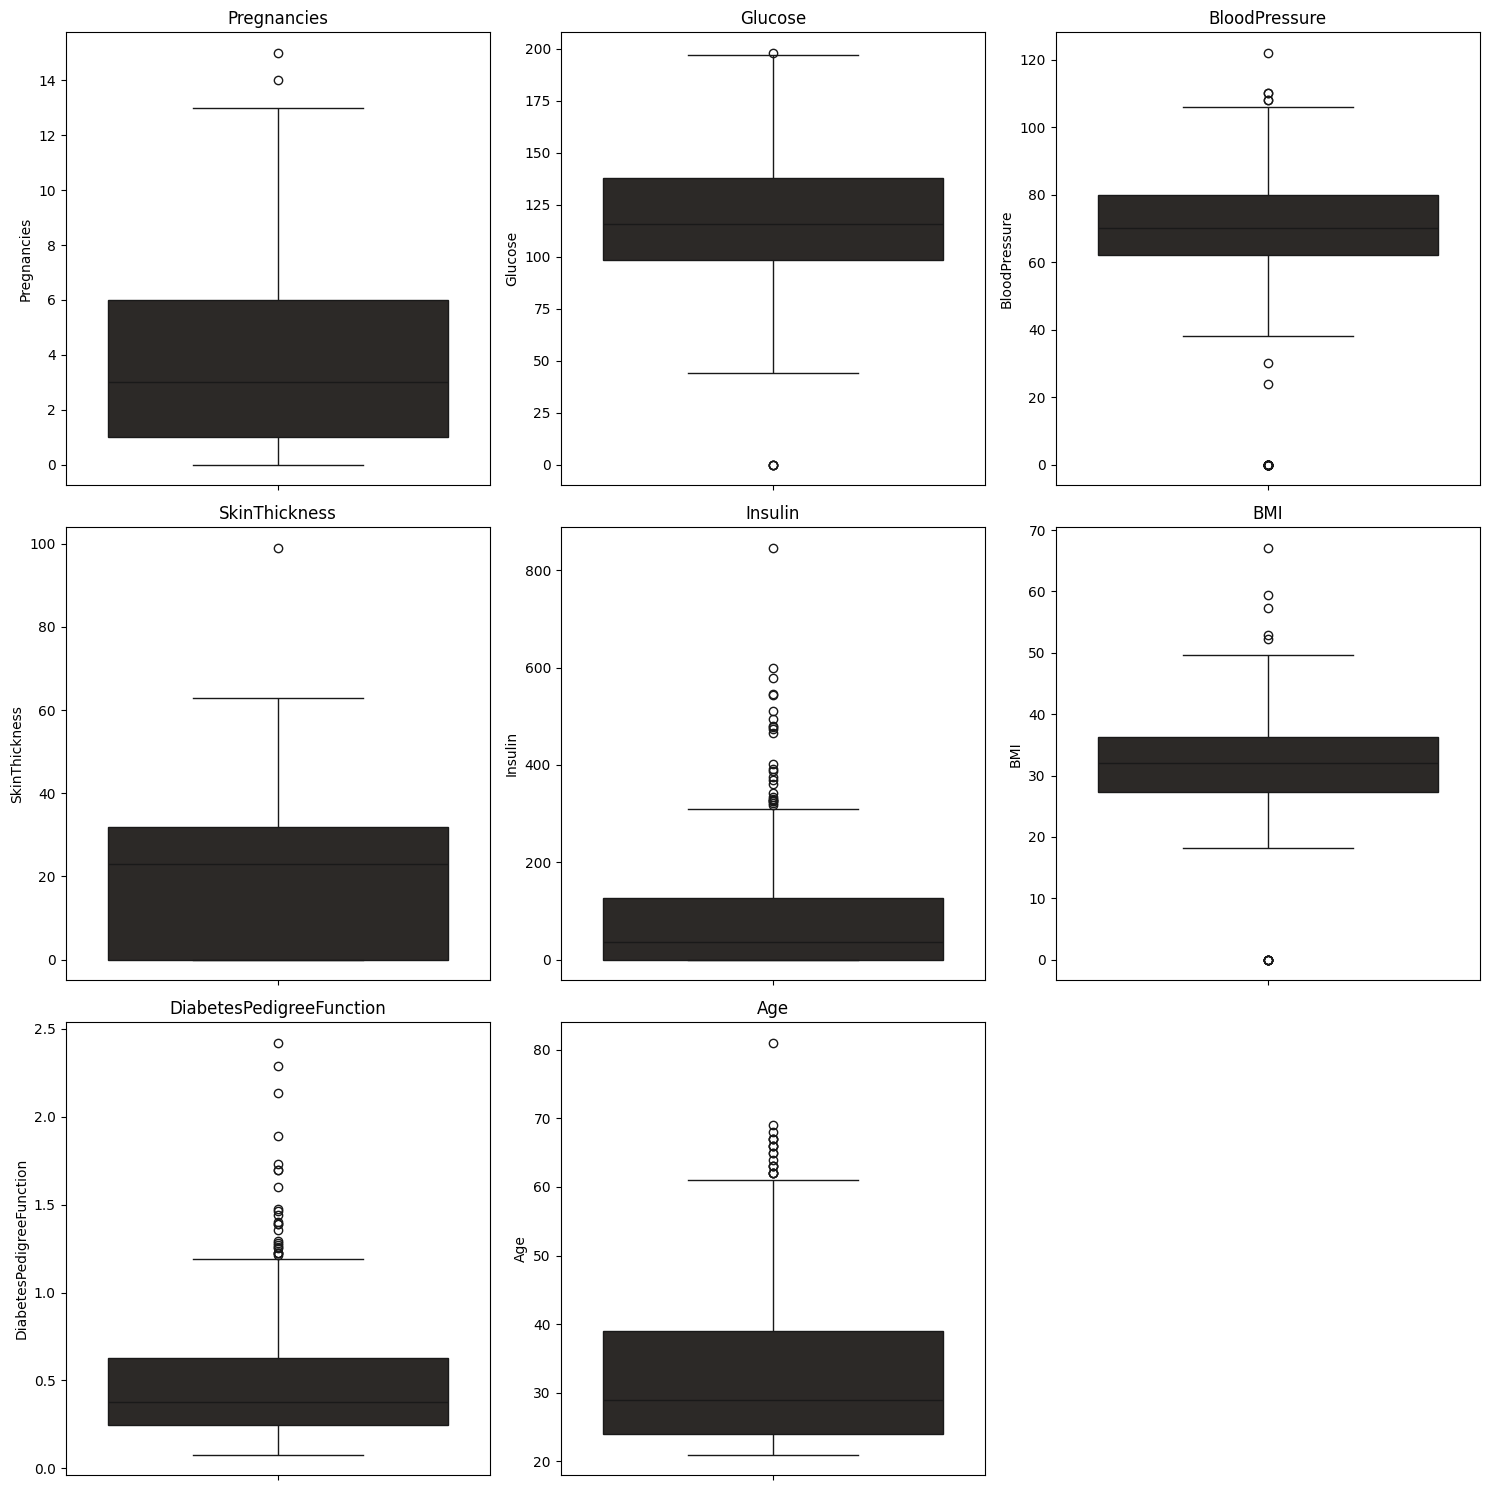

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#FF781F', '#2D2926']

numerical_features = [
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

ax = ax.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(
        y=patient_data[feature],
        color=colors[1],
        ax=ax[i]
    )
    ax[i].set_title(feature)

# letztes ungenutztes Feld ausschalten
ax[-1].axis("off")

plt.tight_layout()
plt.show()


Korrelation zwischen Features.
Die zwei getrennten Heatmaps machen das Lesen leichter.
Sehr nützlich für Featureverständnis.

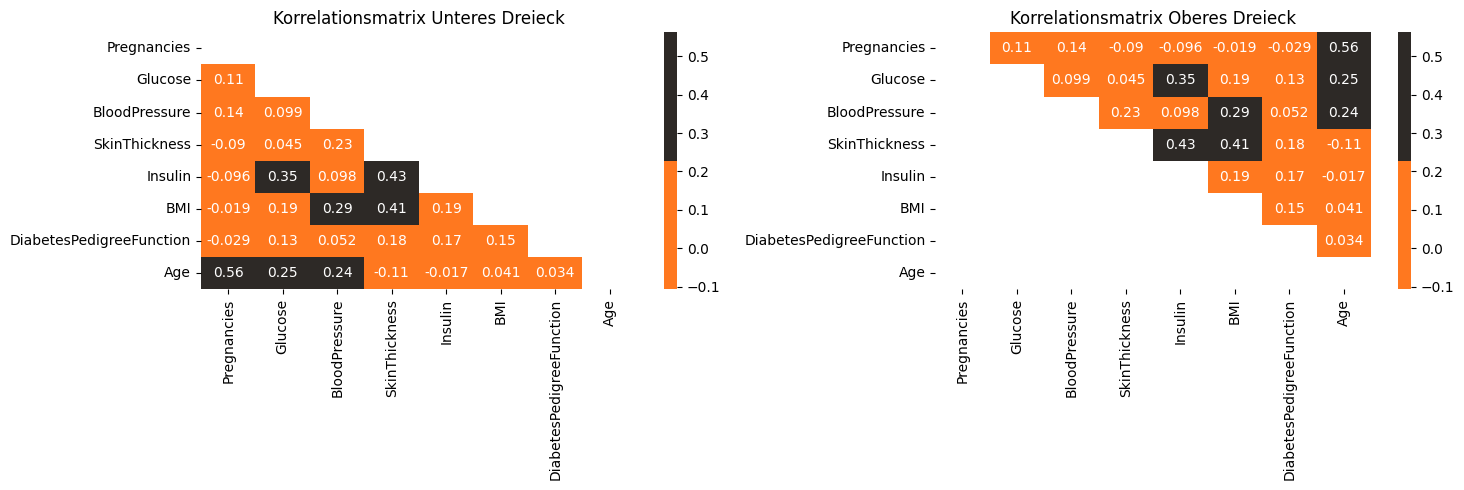

In [187]:
colors = ['#FF781F', '#2D2926']

# Kopie des DataFrames ohne Zielvariable
data_corr = patient_data.drop(columns=['Outcome'])

# Korrelationsmatrix
corr = data_corr.corr()

# obere und untere Dreiecksmatrix
upper_tri = np.triu(corr)
lower_tri = np.tril(corr)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Heatmap obere Hälfte ausblenden
plt.subplot(1, 2, 1)
sns.heatmap(corr, cmap=colors, annot=True, mask=upper_tri, cbar=True)
plt.title("Korrelationsmatrix Unteres Dreieck")

# Heatmap untere Hälfte ausblenden
plt.subplot(1, 2, 2)
sns.heatmap(corr, cmap=colors, annot=True, mask=lower_tri, cbar=True)
plt.title("Korrelationsmatrix Oberes Dreieck")

plt.tight_layout()
plt.show()

Du erzeugst aus mehreren Features zusammengesetzte Gesundheitsindexe:
Metabolic Health, Cardio Health, Body Composition, Demographics.

In [188]:
df1 = pd.DataFrame()

# 1. Metabolic Health
df1['MetabolicHealth'] = (
    patient_data['Glucose'] / patient_data['Glucose'].mean() +
    patient_data['Insulin'] / patient_data['Insulin'].mean() +
    patient_data['BMI'] / patient_data['BMI'].mean() +
    patient_data['DiabetesPedigreeFunction'] / patient_data['DiabetesPedigreeFunction'].mean()
)

# 2. Cardiovascular Health
df1['CardioHealth'] = (
    patient_data['BloodPressure'] / patient_data['BloodPressure'].mean()
)

# 3. Body Composition
df1['BodyComposition'] = (
    patient_data['SkinThickness'] / patient_data['SkinThickness'].mean() +
    patient_data['BMI'] / patient_data['BMI'].mean()
)

# 4. Demographic Factors
df1['Demographics'] = (
    patient_data['Pregnancies'] / patient_data['Pregnancies'].mean() +
    patient_data['Age'] / patient_data['Age'].mean()
)

df1['Outcome'] = patient_data['Outcome']  # wieder anhängen, falls benötigt

df1.head()


,MetabolicHealth,CardioHealth,BodyComposition,Demographics,Outcome
0,3.767252,0.843586,1.760882,0.932527,0.0
1,1.539335,1.396281,0.000000,3.755930,1.0
2,2.160810,0.872676,1.928805,1.288157,0.0
3,3.063373,1.425370,1.656590,2.172869,1.0
4,8.656292,0.727230,1.582974,0.993252,0.0


MinMaxScaler wird korrekt NUR auf dem Training gefittet und dann auf Test angewendet.
Sehr wichtig für Clustering, PCA und Classification.

In [189]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

# Fit only on training data
X_train_scaled = pd.DataFrame(
    mms.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

# Transform test data
X_test_scaled = pd.DataFrame(
    mms.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

X_train_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
56,0.266667,0.676768,0.654545,0.000000,0.0,0.400673,0.084970,0.812500
474,0.600000,0.858586,0.672727,0.313131,0.0,0.740741,0.138770,0.458333
342,0.266667,0.454545,0.000000,0.000000,0.0,0.471380,0.227156,0.208333
39,0.466667,0.631313,0.781818,0.000000,0.0,0.632997,0.096499,0.625000
100,0.133333,0.505051,0.581818,0.232323,0.0,0.500000,0.123826,0.000000


Hier wird ein zweites Dataset df2 für PCA vorbereitet.
BMI wird standardisiert, alle anderen normalisiert.
Das ist technisch korrekt, aber etwas redundant, da X_train_scaled bereits existiert.

In [190]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df2 = patient_data.copy()   # Kopie erstellen

# Alle Features außer Outcome
col = list(df2.columns)
col.remove('BMI')       # BMI wird standardisiert
col.remove('Outcome')   # Outcome nie skalieren

# 1. BMI standardisieren
ss = StandardScaler()
df2['BMI'] = ss.fit_transform(df2[['BMI']])

# 2. Alle anderen Features normalisieren
mms = MinMaxScaler()
for feature in col:
    df2[feature] = mms.fit_transform(df2[[feature]])

# Outcome wieder anhängen
# (war nie entfernt, wird nur nicht skaliert)
df2.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.066667,0.550505,0.475410,0.181818,0.137116,-0.443255,0.060205,0.016667,0.0
1,0.533333,0.631313,0.786885,0.000000,0.000000,-4.122991,0.065756,0.550000,1.0
2,0.133333,0.409091,0.491803,0.222222,0.000000,-0.546546,0.090521,0.066667,0.0
3,0.333333,0.580808,0.803279,0.000000,0.000000,2.707116,0.055935,0.116667,1.0
4,0.066667,0.974747,0.409836,0.161616,0.443262,-0.778950,0.246371,0.050000,0.0


PCA wird auf df2_features ausgeführt und alle Komponenten generiert.
Sehr wichtig für PCA Analyse und PCA Plot.

In [191]:
from sklearn.decomposition import PCA
import pandas as pd

# 1. Outcome entfernen, denn PCA darf nur Featuredaten enthalten
df2_features = df2.drop(columns=['Outcome'])

# 2. PCA Modell erstellen (alle Komponenten)
pca = PCA()

# 3. Transformieren
pca_values = pca.fit_transform(df2_features)

# 4. Neues DataFrame erzeugen
component_names = [f"PC{i+1}" for i in range(pca_values.shape[1])]
pca_df2 = pd.DataFrame(pca_values, columns=component_names)

# 5. explained variance ausgeben
pca.explained_variance_


array([1.0104347 , 0.07114334, 0.03178615, 0.02461506, 0.02136066,
       0.0177214 , 0.01455137, 0.00856624])

Zeigt, wie viel Varianz die Hauptkomponenten erklären.

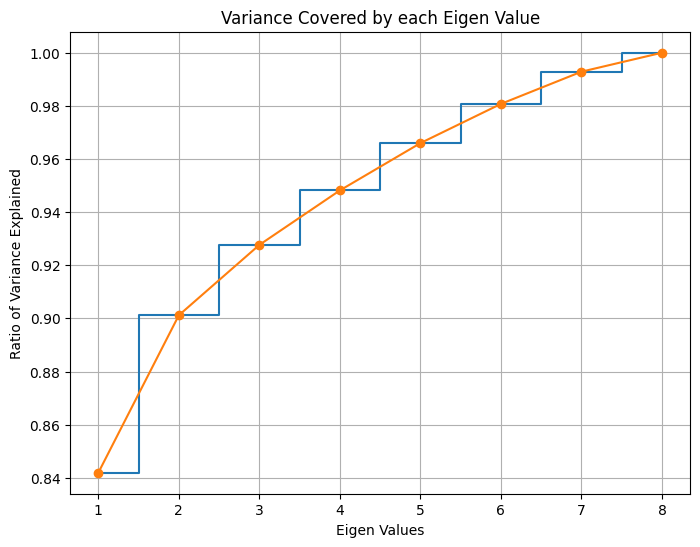

In [192]:
import matplotlib.pyplot as plt
import numpy as np

cum_var = np.cumsum(pca.explained_variance_ratio_)
n_comp = len(cum_var)

plt.figure(figsize=(8,6))

plt.step(
    range(1, n_comp + 1),
    cum_var,
    where='mid'
)

plt.plot(
    range(1, n_comp + 1),
    cum_var,
    marker='o'
)

plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.grid(True)
plt.show()


PCA Scatterplot: Zeigt PC1 und PC2, farblich nach Outcome.

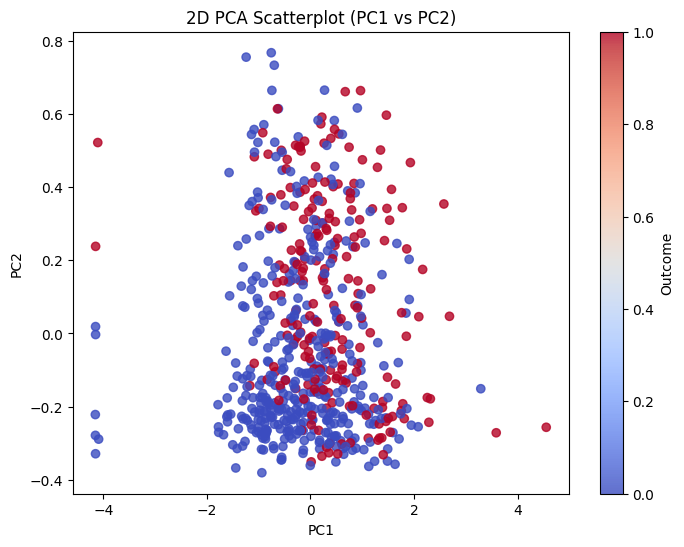

In [193]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(pca_df2['PC1'], pca_df2['PC2'], c=y, cmap='coolwarm', alpha=0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("2D PCA Scatterplot (PC1 vs PC2)")
plt.colorbar(label="Outcome")
plt.show()



Elbow und Silhouette für KMeans: Wählt optimale Clusterzahl. Sehr wichtig für Clustering.

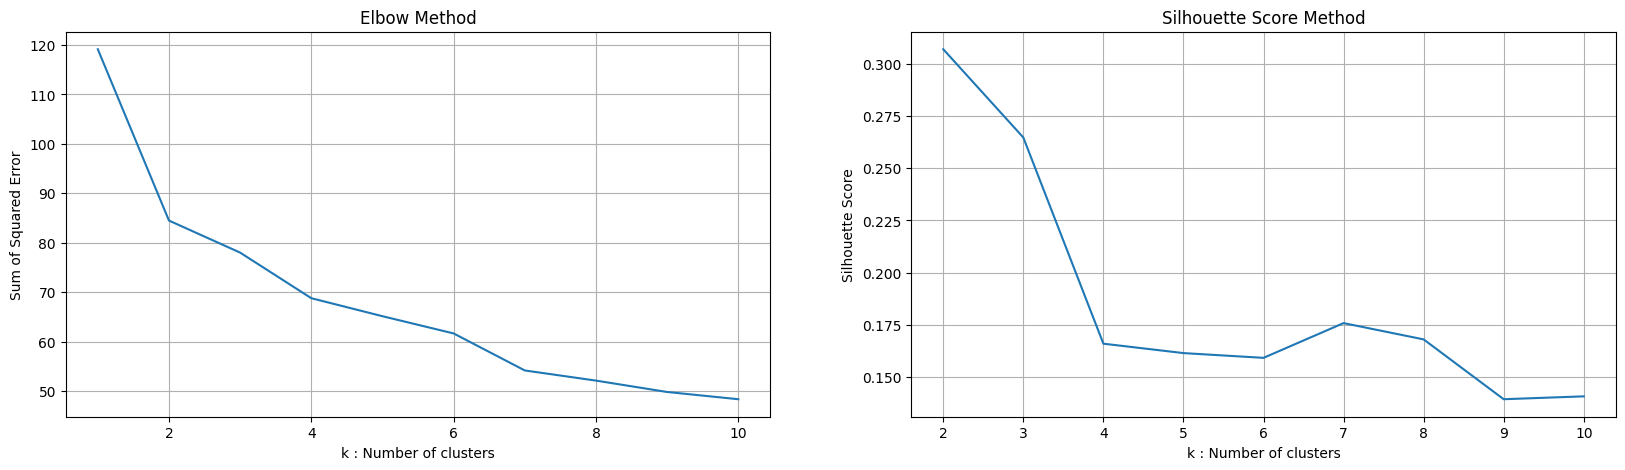

In [194]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Wir clustern auf den skalierten Trainingsdaten
m1 = X_train_scaled.copy()

sse = {}        # inertia values
sil = []        # silhouette values
kmax = 10

fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Elbow Methode
plt.subplot(1, 2, 1)
for k in range(1, kmax + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(m1)
    sse[k] = kmeans.inertia_

sns.lineplot(x=list(sse.keys()), y=list(sse.values()))
plt.title('Elbow Method')
plt.xlabel('k : Number of clusters')
plt.ylabel('Sum of Squared Error')
plt.grid()

# Silhouette Score Methode
plt.subplot(1, 2, 2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric='euclidean'))

sns.lineplot(x=list(range(2, kmax + 1)), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid()

plt.show()



PCA auf 3 Komponenten für Cluster

In [195]:
from sklearn.decomposition import PCA

pca3 = PCA(n_components=3)
pca3_values = pca3.fit_transform(X_train_scaled)

pca3_df = pd.DataFrame(
    pca3_values,
    columns=['PC1', 'PC2', 'PC3'],
    index=X_train_scaled.index
)


Clustermodel wird trainiert.
Clusterlabels werden in pca3_df gespeichert.
Basisinstanz für weitere Modelle.

In [196]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=1000, random_state=42)
model.fit(pca3_df)

centroids = model.cluster_centers_
labels = model.labels_

# Clusterlabels speichern
pca3_df['Cluster'] = labels


3D Clustering Plot

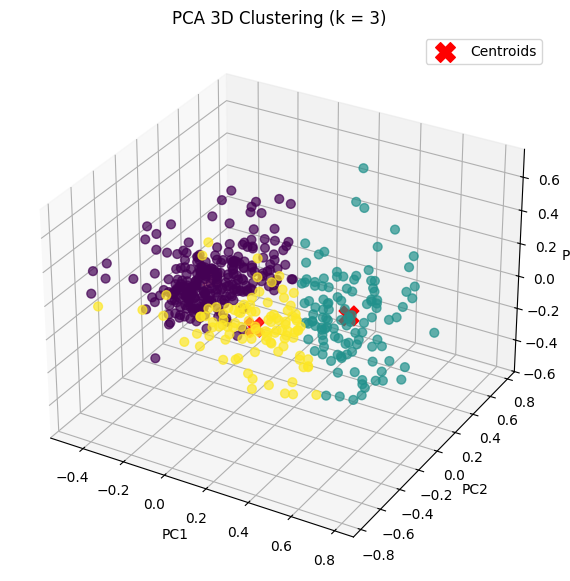

In [197]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Datenpunkte
x = pca3_df['PC1']
y = pca3_df['PC2']
z = pca3_df['PC3']

ax.scatter(
    x, y, z,
    c=pca3_df['Cluster'],
    cmap='viridis',
    s=40,
    alpha=0.7
)

# Zentren
ax.scatter(
    centroids[:,0], centroids[:,1], centroids[:,2],
    color='red',
    marker='X',
    s=200,
    label='Centroids'
)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA 3D Clustering (k = 3)')
plt.legend()
plt.show()


Boxplots für Cluster vs Feature

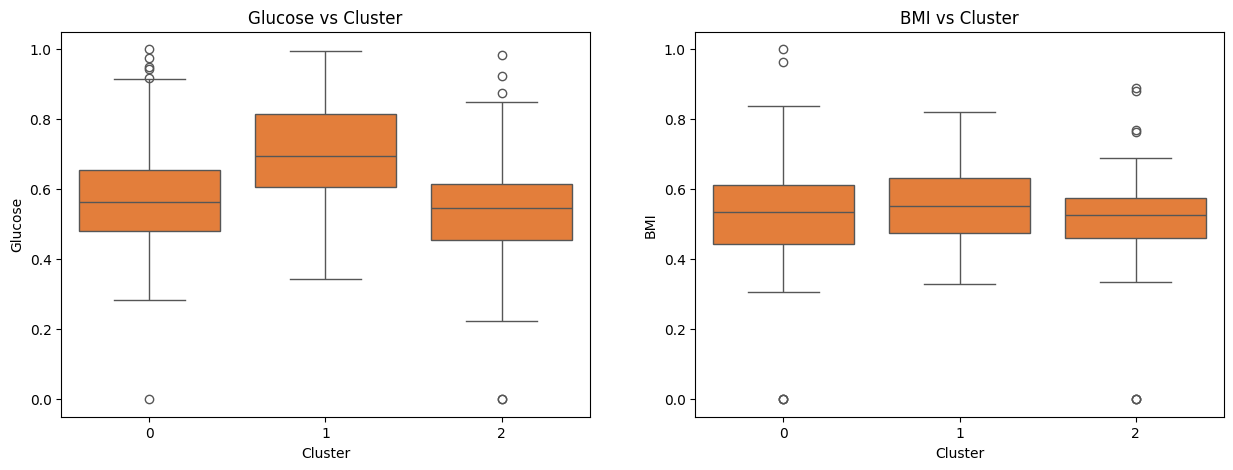

In [198]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Boxplot 1: Glucose vs Cluster
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Glucose', data=X_train_scaled.assign(Cluster=pca3_df['Cluster']), color='#FF781F')
plt.title('Glucose vs Cluster')

# Boxplot 2: BMI vs Cluster
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='BMI', data=X_train_scaled.assign(Cluster=pca3_df['Cluster']), color='#FF781F')
plt.title('BMI vs Cluster')

plt.show()


Patienten pro Cluster

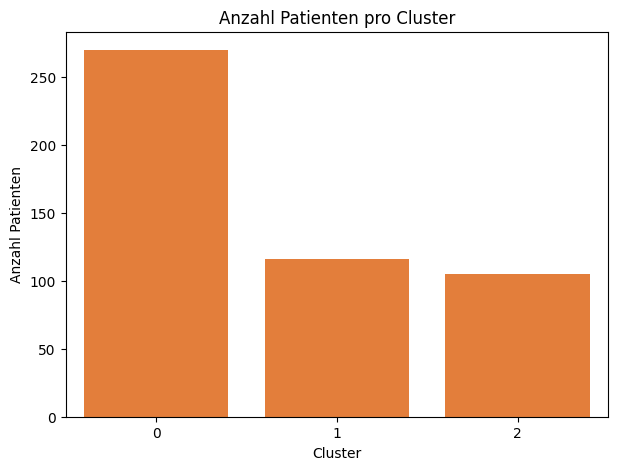

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_counts = pca3_df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(7,5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, color='#FF781F')
plt.xlabel("Cluster")
plt.ylabel("Anzahl Patienten")
plt.title("Anzahl Patienten pro Cluster")
plt.show()


Interaktive Visualisierung der PCA Cluster.

PC1 beschreibt vor allem Alters- und Schwangerschaftsunterschiede,

während PC2 Stoffwechsel- und Blutdruckwerte bündelt (z. B. Glucose, BMI, SkinThickness, BloodPressure).


In [200]:
import plotly.express as px
import pandas as pd

# PCA DataFrame mit PC1, PC2, PC3 und Cluster
pca_plot_df = pca3_df.copy()
pca_plot_df["PC1"] = pca_plot_df["PC1"]
pca_plot_df["PC2"] = pca_plot_df["PC2"]
pca_plot_df["Class"] = pca_plot_df["Cluster"]

# Labels umbenennen wie in deinem Beispiel
pca_plot_df.loc[pca_plot_df["Class"] == 0, "Class"] = "Cluster 0"
pca_plot_df.loc[pca_plot_df["Class"] == 1, "Class"] = "Cluster 1"
pca_plot_df.loc[pca_plot_df["Class"] == 2, "Class"] = "Cluster 2"

fig = px.scatter(
    pca_plot_df,
    x="PC1",
    y="PC2",
    color="Class",
    title="Clusterverteilung im PCA Raum",
    color_discrete_map={
        "Cluster 0": "Green",
        "Cluster 1": "Red",
        "Cluster 2": "Yellow"
    }
)

fig.update_layout(legend_title_text="Cluster Labels")
fig.show()


C:\Users\Natheer\AppData\Local\Temp\ipykernel_33788\1690920285.py:11: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Cluster 0' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.



Zeigt die Mittelwerte der PCA Komponenten der Cluster.

In [201]:
pca_centers = pd.DataFrame(
    model.cluster_centers_,
    columns=['PC1', 'PC2', 'PC3']
)

pca_centers


,PC1,PC2,PC3
0,-0.222758,0.043975,0.010307
1,0.440187,0.045588,0.029954
2,0.086505,-0.163442,-0.059596


PCA Komponentenmatrix

In [202]:
pd.DataFrame(pca3.components_, columns=X_train_scaled.columns, index=['PC1','PC2','PC3'])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
PC1,0.609493,0.176135,0.207335,-0.052085,-0.004406,0.053978,0.026041,0.740394
PC2,-0.238413,0.289686,0.458684,0.574841,0.361417,0.362907,0.236727,0.006706
PC3,-0.400040,0.647252,-0.461758,-0.242096,0.209218,-0.094907,0.105448,0.292068


RandomForest Baseline Modell

Baseline Modell (ohne Cluster)
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83        80
         1.0       0.71      0.56      0.62        43

    accuracy                           0.76       123
   macro avg       0.75      0.72      0.73       123
weighted avg       0.76      0.76      0.76       123

Accuracy: 0.7642276422764228

Metrics:
Accuracy: 0.7642276422764228
Precision: 0.7058823529411765
Recall: 0.5581395348837209
F1 Score: 0.6233766233766234


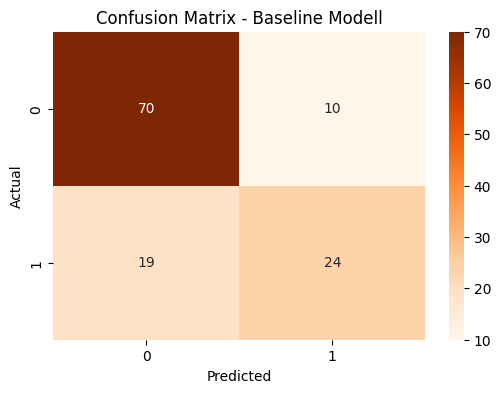

In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Basismodell ohne Cluster
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_scaled, y_train)

# Vorhersage
pred_base = rf_base.predict(X_test_scaled)

print("Baseline Modell (ohne Cluster)")
print(classification_report(y_test, pred_base))
print("Accuracy:", accuracy_score(y_test, pred_base))

# Einzelmetriken korrekt berechnen
acc = accuracy_score(y_test, pred_base)
prec = precision_score(y_test, pred_base)
rec = recall_score(y_test, pred_base)
f1 = f1_score(y_test, pred_base)

print("\nMetrics:")
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, pred_base)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Baseline Modell")
plt.show()


Confusion Matrix

70-> richtige Prediction für gesunde

24-> richtige Prediction für Diabetiker

Modell mit Cluster Feature

In [204]:
# Transform test data using the same PCA model
X_test_pca = pca3.transform(X_test_scaled)

# Predict clusters on PCA-transformed test data
test_clusters = model.predict(X_test_pca)

# Add cluster labels to train and test sets
X_train_clustered = X_train_scaled.copy()
X_train_clustered["Cluster"] = pca3_df["Cluster"]

X_test_clustered = X_test_scaled.copy()
X_test_clustered["Cluster"] = test_clusters

rf_cluster = RandomForestClassifier(random_state=42)
rf_cluster.fit(X_train_clustered, y_train)

pred_cluster = rf_cluster.predict(X_test_clustered)

print("Modell mit Cluster Feature")
print(classification_report(y_test, pred_cluster))
print("Accuracy:", accuracy_score(y_test, pred_cluster))

Modell mit Cluster Feature
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        80
         1.0       0.65      0.56      0.60        43

    accuracy                           0.74       123
   macro avg       0.71      0.70      0.70       123
weighted avg       0.73      0.74      0.73       123

Accuracy: 0.7398373983739838


c:\Users\Natheer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



Accuracy, Precision, Recall, F1

In [209]:
acc = accuracy_score(y_test, pred_base)
prec = precision_score(y_test, pred_base)
rec = recall_score(y_test, pred_base)
f1 = f1_score(y_test, pred_base)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)


Accuracy: 0.7642276422764228
Precision: 0.7058823529411765
Recall: 0.5581395348837209
F1 Score: 0.6233766233766234
